In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.model_selection import train_test_split # previously from sklearn.cross_validation
from sklearn import svm, metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [99]:
data= pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [126]:
data.sport.unique()

array(['athletics', 'fencing', 'taekwondo', 'cycling', 'triathlon',
       'volleyball', 'aquatics', 'rugby sevens', 'wrestling', 'football',
       'shooting', 'equestrian', 'rowing', 'judo', 'handball',
       'badminton', 'hockey', 'modern pentathlon', 'table tennis',
       'canoe', 'basketball', 'golf', 'archery', 'weightlifting',
       'sailing', 'tennis', 'gymnastics'], dtype=object)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


In [101]:
data = data.dropna()

In [102]:
data['total medals'] = data[['gold','silver', 'bronze']].sum(axis=1)
data['medal dummy'] = data['total medals'].mask(data['total medals'] > 0, 1)
data['sex dummy'] =  np.where(data['sex'] == 'male', 1, 0) #data['sex'].where(data['sex'] == 'male', 0,1)
data['dob'] = pd.to_datetime(data['dob'], format='%m/%d/%y')
this_year = date.today().year
data['age']=data['dob'].map(lambda x:   this_year - x.year )
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,total medals,medal dummy,sex dummy,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,0,0,1,49
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,0,0,0,32
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,1,1,1,26
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,0,0,1,27
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,0,0,1,28


In [123]:
data_short = data[data.sport == 'aquatics']
data_country = data[ [data.columns[2]] + data.columns[8:13].tolist()].groupby('nationality').sum()
data_country_aq = data_short[ [data_short.columns[2]] + data_short.columns[8:13].tolist()].groupby('nationality').sum()
data_short = data_short.drop(['id','name','sex','dob', 'sport', 'gold', 'silver','bronze'],1)
data_short.head()

,nationality,height,weight,total medals,medal dummy,sex dummy,age
7,AUS,1.93,100.0,0,0,1,27
14,USA,1.78,68.0,2,1,0,22
26,SUD,1.81,72.0,0,0,1,24
45,SEN,1.90,90.0,0,0,1,30
64,USA,1.66,61.0,0,0,0,29


In [158]:
pd.get_dummies(data_short['total medals']).iloc[:,1:6].sum(axis=1).head()

7     0
14    1
26    0
45    0
64    0
dtype: int64

In [124]:
data_country.head()

,gold,silver,bronze,total medals,medal dummy
nationality,,,,,
AFG,0,0,0,0,0
ALB,0,0,0,0,0
ALG,0,2,0,2,1
AND,0,0,0,0,0
ANG,0,0,0,0,0


In [125]:
data_country_aq.head()

,gold,silver,bronze,total medals,medal dummy
nationality,,,,,
ALB,0,0,0,0,0
ALG,0,0,0,0,0
AND,0,0,0,0,0
ANG,0,0,0,0,0
ANT,0,0,0,0,0


In [137]:
data_short.describe()

,height,weight,total medals,medal dummy,sex dummy,age
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,1.788338,72.277221,0.239971,0.184097,0.502149,25.906160
std,0.110270,14.334151,0.591826,0.387703,0.500175,4.341903
min,1.430000,39.000000,0.000000,0.000000,0.000000,16.000000
25%,1.700000,61.000000,0.000000,0.000000,0.000000,23.000000
50%,1.780000,70.000000,0.000000,0.000000,1.000000,25.000000
75%,1.870000,82.000000,0.000000,0.000000,1.000000,29.000000
max,2.210000,130.000000,6.000000,1.000000,1.000000,43.000000


In [127]:
data_short['total medals'].unique()

array([0, 2, 1, 3, 4, 5, 6])

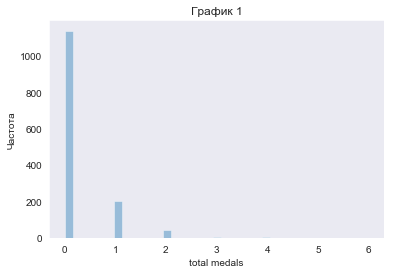

In [134]:
sns.set_style('dark')
plt.title('График 1')
plt.ylabel('Частота')
sns.distplot(data_short['total medals'], kde=False);

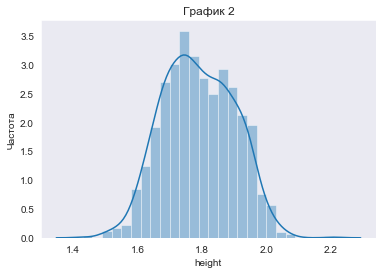

In [135]:
plt.title('График 2')
plt.ylabel('Частота')
sns.distplot(data_short['height']);

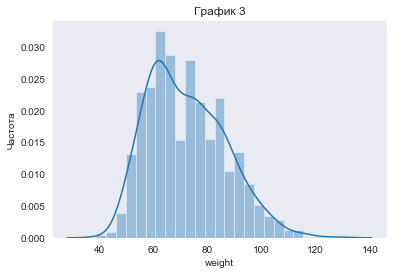

In [136]:
plt.title('График 3')
plt.ylabel('Частота')
sns.distplot(data_short['weight'])

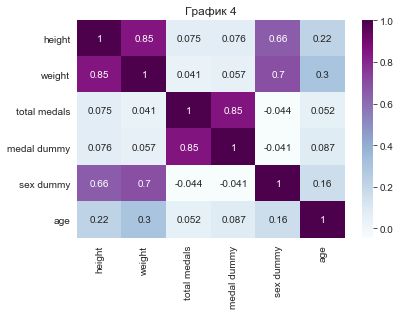

In [138]:
data_corr = data_short.corr()
data_corr
plt.title('График 4')
sns.heatmap(data_corr, annot = True, cmap = 'BuPu')

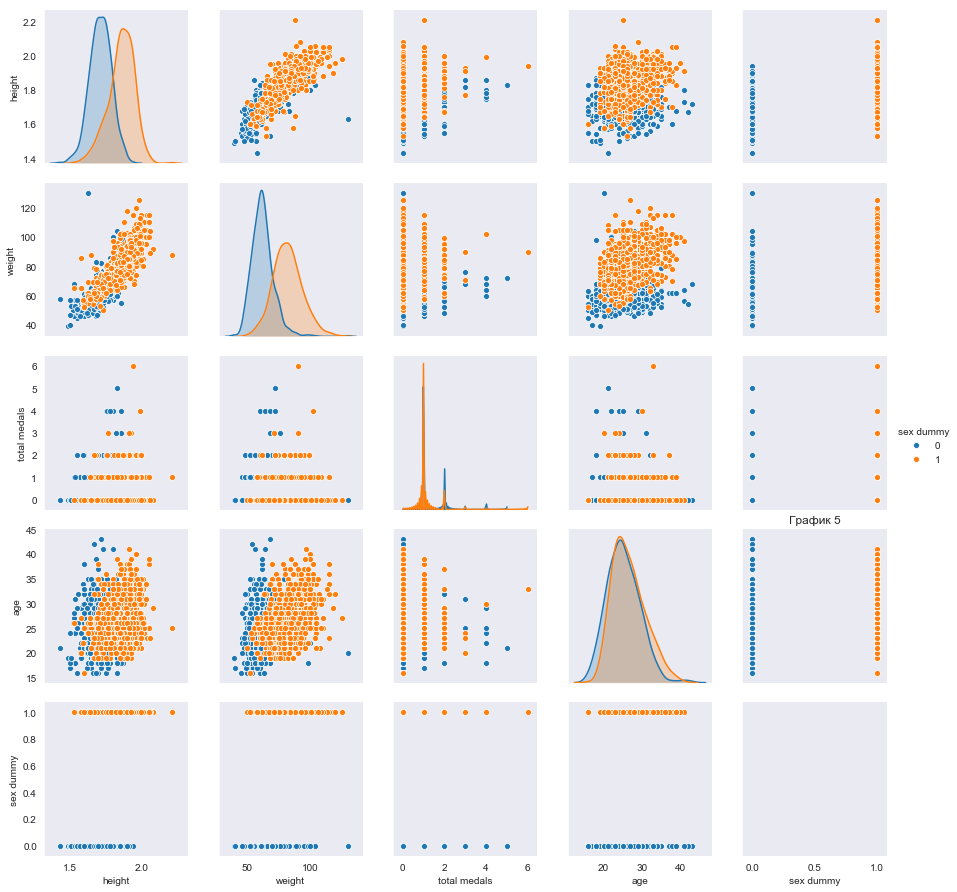

In [216]:
sns.pairplot(data_short[['height','weight', 'total medals', 'age', 'sex dummy']], hue='sex dummy');
plt.title('График 5');

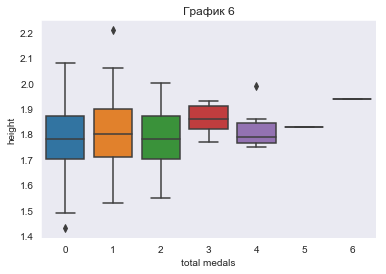

In [214]:
sns.boxplot(data=data_short, y='height', x='total medals' );
plt.title('График 6');

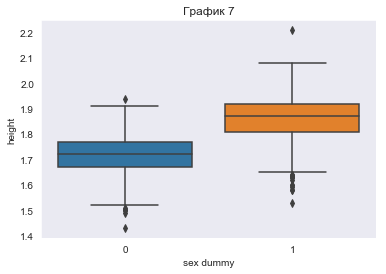

In [217]:
sns.boxplot(data=data_short, y='height', x='sex dummy' );
plt.title('График 7');

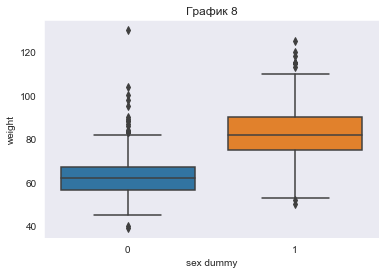

In [218]:
sns.boxplot(data=data_short, y='weight', x='sex dummy' );
plt.title('График 8');

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [155]:
data_short.head()

,nationality,height,weight,total medals,medal dummy,sex dummy,age
7,AUS,1.93,100.0,0,0,1,27
14,USA,1.78,68.0,2,1,0,22
26,SUD,1.81,72.0,0,0,1,24
45,SEN,1.90,90.0,0,0,1,30
64,USA,1.66,61.0,0,0,0,29


In [161]:
data_short.iloc[:, [1,2,5,6]].head()

,height,weight,sex dummy,age
7,1.93,100.0,1,27
14,1.78,68.0,0,22
26,1.81,72.0,1,24
45,1.90,90.0,1,30
64,1.66,61.0,0,29


In [163]:
Y = data_short['medal dummy']
X = data_short.iloc[:, [1,2,5,6]]

In [164]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.7, random_state=234)

In [165]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
Y_predicted = model.predict(X_val)

$$ Accuracy = \dfrac{TP+TN}{TP+TN+FP+FN} $$

In [180]:
metrics.accuracy_score(Y_val,Y_predicted)

0.8179959100204499

$$ Precision = \dfrac{TP}{TP+FP} $$

In [182]:
metrics.precision_score(Y_val,Y_predicted, average=None)

array([0.81883316, 0.        ])

In [185]:
metrics.precision_score(Y_val,Y_predicted, average='weighted')

0.6706394308355992


$$ Recall = \dfrac{TP}{TP+FN} $$


In [196]:
metrics.recall_score(Y_val,Y_predicted, average=None)

array([0.99875156, 0.        ])

In [198]:
metrics.recall_score(Y_val,Y_predicted, average='weighted')

0.8179959100204499

In [191]:
df = pd.DataFrame()
df['a'] = Y_val
df['b'] = Y_predicted

df[(df['a'] == 1 ) &  (df['b'] == 1 )]

,a,b


In [192]:
df[(df['a'] == 0 ) &  (df['b'] == 1 )]

,a,b
6809,0,1


In [194]:
model.coef_

array([[-1.28121709,  0.02557186, -0.59670422,  0.03340059]])

In [195]:
model.intercept_

array([-1.53878147])

In [226]:
data_country['total medals'].nlargest(4)

nationality
USA    258
GER    159
GBR    141
CHN    109
Name: total medals, dtype: int64

In [228]:
data_country_aq['total medals'].nlargest(4)

nationality
USA    88
AUS    34
ITA    33
CHN    31
Name: total medals, dtype: int64

In [231]:
import plotly
plotly.tools.set_credentials_file(username='xenakas', api_key='jok93h4v7jRdO7bCox6I')

data = [ dict(
        type = 'choropleth',
        locations = data_country.index,
        z = data_country['total medals'],
        text = data_country.index,
        #colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"], [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False, # tickprefix = '', title = '' 
        ),
      ) ]

layout = dict(
    title = 'Количество медалей по всем видам спорта',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~xenakas/0 or inside your plot.ly account where it is named 'd3-world-map'


In [229]:
data1 = [ dict(
        type = 'choropleth',
        locations = data_country_aq.index,
        z = data_country_aq['total medals'],
        text = data_country_aq.index,
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False, ),  ) ]

layout1 = dict(
    title = 'Количество медалей по плаванию',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data1, layout=layout1 )
py.iplot( fig, validate=False, filename='d3-world-map1' )
